https://github.com/dav1ddramb for https://t.me/halftimestat

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
from sklearn.neighbors import KernelDensity
import plotly.express as px

headers = {'User-Agent': 
       ('Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko)' 
        'Chrome/47.0.2526.106 Safari/537.36')}

### draws per game (before and after 3-points-for-win introduced)

In [25]:
wcg = pd.read_csv('WorldCupMatches.csv').drop_duplicates()
wcg['Year'] = wcg['Year'].fillna(0).astype(int)
wcg['draw'] = wcg['Home Team Goals'] == wcg['Away Team Goals']

stages = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H', 
          'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6']
wcg_gr = wcg[(wcg['Stage'].isin(stages))] # (wcg['Year']>=1986)&(wcg['Stage']=='Round of 16')]
wcg_gr.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,draw
815,2014,25 Jun 2014 - 17:00,Group E,Estadio do Maracana,Rio De Janeiro,Ecuador,0.0,0.0,France,,...,0.0,0.0,Noumandiez DOUE (CIV),YEO Songuifolo (CIV),BIRUMUSHAHU Jean Claude (BDI),255931.0,300186515.0,ECU,FRA,True
816,2014,26 Jun 2014 - 13:00,Group G,Arena Pernambuco,Recife,USA,0.0,1.0,Germany,,...,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255931.0,300186469.0,USA,GER,False
817,2014,26 Jun 2014 - 13:00,Group G,Estadio Nacional,Brasilia,Portugal,2.0,1.0,Ghana,,...,1.0,0.0,SHUKRALLA Nawaf (BHR),TULEFAT Yaser (BHR),SALEH Ebrahim (BHR),255931.0,300186476.0,POR,GHA,False
818,2014,26 Jun 2014 - 17:00,Group H,Arena de Sao Paulo,Sao Paulo,Korea Republic,0.0,1.0,Belgium,,...,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255931.0,300186480.0,KOR,BEL,False
819,2014,26 Jun 2014 - 17:00,Group H,Arena da Baixada,Curitiba,Algeria,1.0,1.0,Russia,,...,0.0,1.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255931.0,300186506.0,ALG,RUS,True


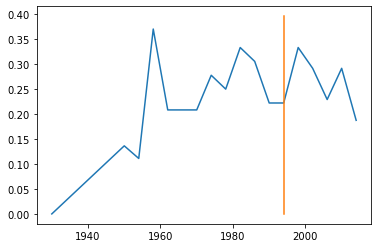

In [26]:
draw_ratio = wcg_gr.groupby('Year').sum().draw / wcg_gr.groupby('Year').count().Datetime

plt.plot(draw_ratio.index, draw_ratio.values)
plt.plot([1994]*100, np.arange(0, 0.4, 0.4/100))
plt.show()

#### english

In [3]:
eng = pd.read_csv('england.csv', dtype={'division': 'str'})
eng['draw'] = eng['result']=='D'
eng[(eng.tier==1)&(eng.division!='1')]

,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result,draw


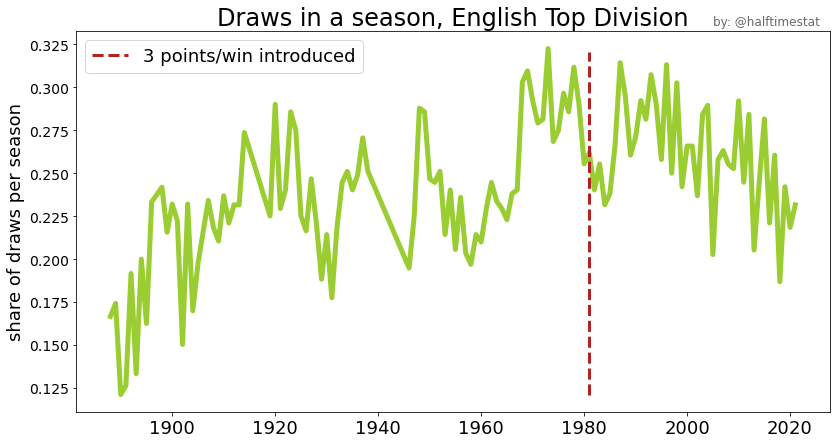

In [4]:
# pl = eng[(eng.division=='1')&(eng.Season>1974)&(eng.Season<1987)]
pl = eng[(eng.division=='1')] # &(eng.Season>1930)]
draw_ratio = pl.groupby('Season').sum().draw / pl.groupby('Season').count().Date

# with plt.xkcd():
plt.figure(figsize=(13.5, 7), facecolor='white')
plt.plot(draw_ratio.index, draw_ratio.values, linewidth=5, color='yellowgreen')
plt.plot([1981]*100, np.arange(min(draw_ratio), max(draw_ratio), (max(draw_ratio)-min(draw_ratio))/100), 
         '--', linewidth=3, label='3 points/win introduced', color='firebrick')
plt.title('Draws in a season, English Top Division', size=24)
plt.ylabel('share of draws per season', size=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.text(2005, 0.336, 'by: @halftimestat', color='dimgrey', size=12)
plt.show()

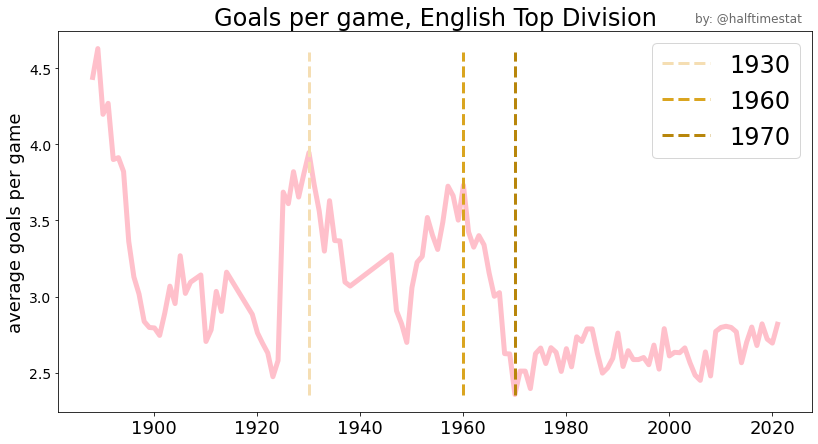

In [14]:
pl = eng[(eng.division=='1')] # &(eng.Season>1930)]
totgoals_game = pl.groupby('Season').sum().totgoal / pl.groupby('Season').count().Date

# with plt.xkcd():
plt.figure(figsize=(13.5, 7), facecolor='white')
plt.plot(totgoals_game.index, totgoals_game.values, linewidth=5, color='pink')
# plt.plot([1981]*100, np.arange(min(totgoals_game), max(totgoals_game), (max(totgoals_game)-min(totgoals_game))/100), 
#          '--', linewidth=3, label='3 points/win introduced', color='black')
plt.plot([1930]*100, np.arange(min(totgoals_game), max(totgoals_game), (max(totgoals_game)-min(totgoals_game))/100), 
         '--', linewidth=3, label='1930', color='wheat')
plt.plot([1960]*100, np.arange(min(totgoals_game), max(totgoals_game), (max(totgoals_game)-min(totgoals_game))/100), 
         '--', linewidth=3, label='1960', color='goldenrod')
plt.plot([1970]*100, np.arange(min(totgoals_game), max(totgoals_game), (max(totgoals_game)-min(totgoals_game))/100), 
         '--', linewidth=3, label='1970', color='darkgoldenrod')
plt.title('Goals per game, English Top Division', size=24)
plt.ylabel('average goals per game', size=18)
plt.legend(fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.text(2005, 4.8, 'by: @halftimestat', color='dimgrey', size=12)
plt.show()

👇 This is why football records should ALWAYS be separated by eras

👴 Our ancestors basically played a different sport in 30s or 50s with 3.7 goals per game


Never compare the greats of the past to modern-day players in raw numbers. Boys playing 2-3-5 are not to be contraposed to players in catenaccio blindly. 👁️ Attention to context.

### PL winner outside BIG-6

In [30]:
def league_table(fixtures):
    df_ls = fixtures.copy()
    conditions = [df_ls['FTHG']>df_ls['FTAG'], df_ls['FTHG']==df_ls['FTAG'], df_ls['FTHG']<df_ls['FTAG']]  
    home_choices, away_choices = [3, 1, 0], [0, 1, 3]
    df_ls['HomePoints'] = np.select(conditions, home_choices, default=np.nan)
    df_ls['AwayPoints'] = np.select(conditions, away_choices, default=np.nan)
    
    home_away_pts = pd.concat([(df_ls[['HomeTeam', 'HomePoints']]).rename(columns={'HomeTeam':'Team', 'HomePoints':'Points'}), 
                               (df_ls[['AwayTeam', 'AwayPoints']]).rename(columns={'AwayTeam':'Team', 'AwayPoints':'Points'})])
    home_away_pts = home_away_pts.groupby('Team', as_index=False).sum().sort_values('Points', ascending=False).reset_index(drop=True)
    return home_away_pts

In [33]:
winner_outsidebig6 = []
for train_start in range(10, 22):
    big6 = ['Arsenal', 'Chelsea', 'Liverpool', 'Man City', 'Man United', 'Tottenham']
    pl_seas_fixtures = pd.read_csv('/Users/daviddramb/Downloads/[HTS]/footballdata_fixtures/E0/E0_'+str(train_start)+str(train_start+1)+'.csv')
    pl_seas_table = league_table(pl_seas_fixtures)
    pl_seas_table_outsidebig6 = pl_seas_table[~pl_seas_table.Team.isin(big6)]
    
    winner_outsidebig6.append([str(train_start)+'/'+str(train_start+1), pl_seas_table_outsidebig6.index[0]+1, 
                               list(pl_seas_table_outsidebig6.Team)[0], list(pl_seas_table_outsidebig6.Points)[0]])
    
#     if train_start==15:
#         break

wos = pd.DataFrame(winner_outsidebig6, columns=['seas', 'pos', 'club', 'points'])

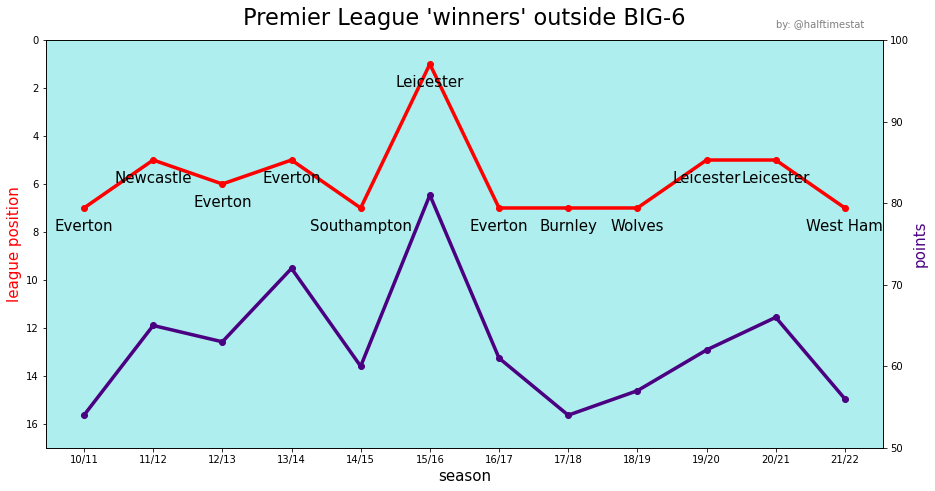

In [36]:
fig,ax = plt.subplots(figsize=(15, 7.5))
fsize= 15
ax.plot(wos.seas, wos.pos, color='red', marker='o', linewidth=3.5)
ax.set_ylim([0, 17])
ax.set_xlabel('season', fontsize=fsize)
ax.set_ylabel('league position', color='red', fontsize=fsize)
ax.set_title('Premier League \'winners\' outside BIG-6', size=fsize*1.5, pad=15)
ax.set_facecolor('paleturquoise') 
plt.gca().invert_yaxis()

ax2=ax.twinx()
ax2.set_ylim([50, 100])
ax2.plot(wos.seas, wos.points, color='indigo',marker='o', linewidth=3.5)
ax2.set_ylabel('points', color='indigo', fontsize=fsize)

i = 0
for x, y in zip(wos.seas, wos.pos):
    label = wos.club[i] # "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,-fsize*1.5), ha='center', size=fsize)
    i += 1

plt.text(10, 101.5, 'by: @halftimestat', c='grey')
plt.show()

### Serie A winner outside BIG-7

In [38]:
winner_outsidebig7 = []
second_outsidebig7 = []
third_outsidebig7 = []
for train_start in range(10, 22):
    big7 = ['Atalanta', 'Inter', 'Juventus', 'Lazio', 'Milan', 'Napoli', 'Roma', 'Fiorentina']
    sa_seas_fixtures = pd.read_csv('/Users/daviddramb/Downloads/[HTS]/footballdata_fixtures/I1/I1_'+str(train_start)+str(train_start+1)+'.csv')
    sa_seas_table = league_table(sa_seas_fixtures)
    sa_seas_table_outsidebig7 = sa_seas_table[~sa_seas_table.Team.isin(big7)]
    
    winner_outsidebig7.append([str(train_start)+'/'+str(train_start+1), sa_seas_table_outsidebig7.index[0]+1, 
                               list(sa_seas_table_outsidebig7.Team)[0], list(sa_seas_table_outsidebig7.Points)[0]])
    
    second_outsidebig7.append([str(train_start)+'/'+str(train_start+1), sa_seas_table_outsidebig7.index[1]+1, 
                               list(sa_seas_table_outsidebig7.Team)[1], list(sa_seas_table_outsidebig7.Points)[1]])
    
    third_outsidebig7.append([str(train_start)+'/'+str(train_start+1), sa_seas_table_outsidebig7.index[2]+1, 
                               list(sa_seas_table_outsidebig7.Team)[2], list(sa_seas_table_outsidebig7.Points)[2]])

wos = pd.DataFrame(winner_outsidebig7, columns=['seas', 'pos', 'club', 'points'])
sos = pd.DataFrame(second_outsidebig7, columns=['seas', 'pos', 'club', 'points'])
tos = pd.DataFrame(third_outsidebig7, columns=['seas', 'pos', 'club', 'points'])

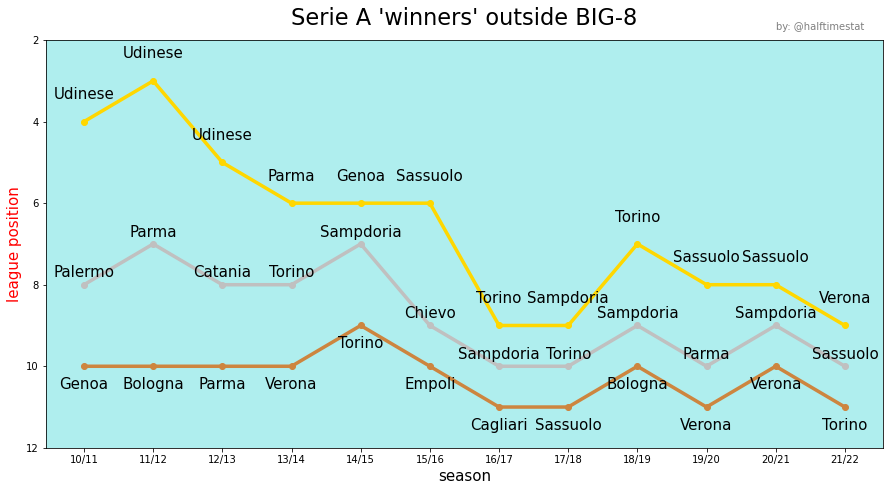

In [39]:
fig,ax = plt.subplots(figsize=(15, 7.5))
fsize= 15
ax.plot(wos.seas, wos.pos, color='gold', marker='o', linewidth=3.5, label='first')
ax.plot(sos.seas, sos.pos, color='silver', marker='o', linewidth=3.5, label='second')
ax.plot(tos.seas, tos.pos, color='peru', marker='o', linewidth=3.5, label='third')
ax.set_ylim([2, 12])
ax.set_xlabel('season', fontsize=fsize)
ax.set_ylabel('league position', color='red', fontsize=fsize)
ax.set_title('Serie A \'winners\' outside BIG-8', size=fsize*1.5, pad=15)
ax.set_facecolor('paleturquoise') 
# fig.legend()
plt.gca().invert_yaxis()

# ax2=ax.twinx()
# ax2.set_ylim([50, 100])
# ax2.plot(wos.seas, wos.points, color='indigo',marker='o', linewidth=3.5, label='first')
# ax2.set_ylabel('points', color='indigo', fontsize=fsize)

i = 0
for x, y in zip(wos.seas, wos.pos):
    ax.annotate(wos.club[i], (x,y), textcoords='offset points', xytext=(0,fsize*1.5), ha='center', size=fsize)
    i += 1

i = 0
for x, y in zip(sos.seas, sos.pos):
    ax.annotate(sos.club[i], (x,y), textcoords='offset points', xytext=(0,fsize*0.5), ha='center', size=fsize)
    i += 1

i = 0
for x, y in zip(tos.seas, tos.pos):
    ax.annotate(tos.club[i], (x,y), textcoords='offset points', xytext=(0,-fsize*1.5), ha='center', size=fsize)
    i += 1

plt.text(10, 1.75, 'by: @halftimestat', c='grey')
plt.show()

### Leicester's win anomaly

In [185]:
def league_table(fixtures):
    df_ls = fixtures.copy()
    conditions = [df_ls['FTHG']>df_ls['FTAG'], df_ls['FTHG']==df_ls['FTAG'], 
                  df_ls['FTHG']<df_ls['FTAG']]    
    home_choices, away_choices = [3, 1, 0], [0, 1, 3]
    df_ls['HomePoints'] = np.select(conditions, home_choices, default=np.nan)
    df_ls['AwayPoints'] = np.select(conditions, away_choices, default=np.nan)
    
    
    home_away_pts = pd.concat([(df_ls[['HomeTeam', 'HomePoints']]).rename(columns={'HomeTeam':'Team', 'HomePoints':'Points'}), 
                               (df_ls[['AwayTeam', 'AwayPoints']]).rename(columns={'AwayTeam':'Team', 'AwayPoints':'Points'})])
    home_away_pts = home_away_pts.groupby('Team').sum().sort_values('Points', ascending=False)
    return home_away_pts


seas, points1, points2, name1, name2 = [], [], [], [], []
for sstart in np.arange(2005, 2022, 1):
    df = pd.read_csv('/Users/daviddramb/Downloads/[HTS]/footballdata_fixtures/E0/E0_'+str(sstart)[2:]+str(sstart+1)[2:]+'.csv') 
    df_table = league_table(df)
    
    seas.append(str(sstart)[2:]+'/'+str(sstart+1)[2:])
    points1.append(df_table.Points[0])
    points2.append(df_table.Points[1])
    name1.append(df_table.index[0])
    name2.append(df_table.index[1])
    print(sstart, end=', ')

2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 

In [126]:
seas_p = pd.DataFrame(np.array([seas, points1, points2, name1, name2]).T, columns=['seas', 'points1', 'points2', 'name1', 'name2'])
seas_p = seas_p.astype(dtype={'seas': 'str', 'points1': 'float', 'points2': 'float', 'name1': 'str', 'name2': 'str'})

firstplace = seas_p[['seas', 'points1', 'name1']].rename(columns={'seas': 'season', 'points1': 'points', 'name1': 'n'})
firstplace['place'] = 'Champion'
secondplace = seas_p[['seas', 'points2', 'name2']].rename(columns={'seas': 'season', 'points2': 'points', 'name2': 'n'})
secondplace['place'] = 'Runner-up'
seas_p = pd.concat([firstplace, secondplace], ignore_index=True)

In [164]:
import plotly.express as px
fig = px.line(seas_p, x='season', y='points', color='place', text='points', 
              color_discrete_sequence=['gold', 'silver'])
# fig = px.line(seas_p, x=seas_p['seas'], y=seas_p['points1'], text=seas_p['points1'])
# fig.add_scatter(x=seas_p['seas'], y=seas_p['points2'], text=seas_p['name2'])

fig.update_traces(textposition='middle right')
fig.update_layout(height=500, width=990, title_text='Premier League points', plot_bgcolor='linen')
fig.update_xaxes(dtick=2)
fig.show()

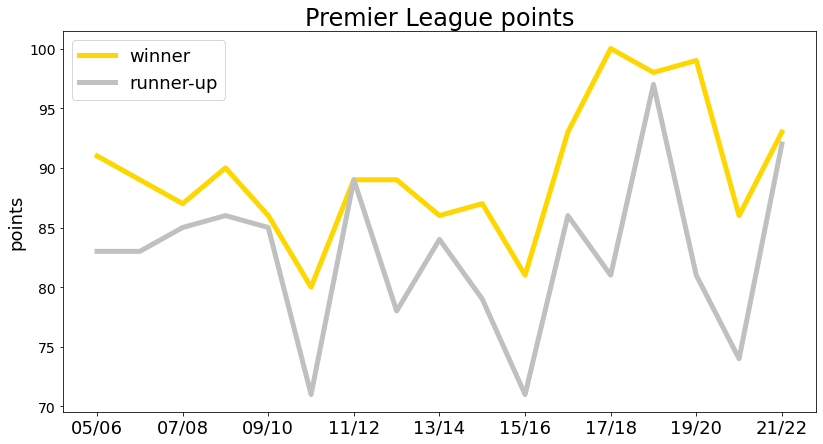

In [171]:
# with plt.xkcd():
plt.figure(figsize=(13.5, 7), facecolor='white')
plt.plot(seas, points1, linewidth=5, color='gold', label='winner')
plt.plot(seas, points2, linewidth=5, color='silver', label='runner-up')

plt.title('Premier League points', size=24)
plt.ylabel('points', size=18)
plt.legend(fontsize=18)
plt.xticks(seas[::2], fontsize=18)
plt.yticks(fontsize=14)
# plt.text(2005, 4.8, 'by: @halftimestat', color='dimgrey', size=12)
plt.show()

1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 

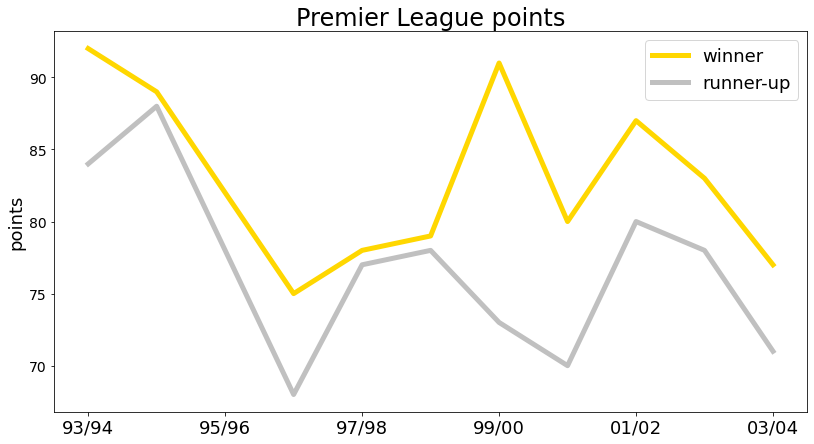

In [181]:
seas, points1, points2, name1, name2 = [], [], [], [], []
for sstart in np.arange(1993, 2004, 1):
    df = pd.read_csv('/Users/daviddramb/Downloads/[HTS]/footballdata_fixtures/E0/E0_'+str(sstart)[2:]+str(sstart+1)[2:]+'.csv') 
    df_table = league_table(df)
    
    seas.append(str(sstart)[2:]+'/'+str(sstart+1)[2:])
    points1.append(df_table.Points[0])
    points2.append(df_table.Points[1])
    name1.append(df_table.index[0])
    name2.append(df_table.index[1])
    print(sstart, end=', ')

# with plt.xkcd():
plt.figure(figsize=(13.5, 7), facecolor='white')
plt.plot(seas, points1, linewidth=5, color='gold', label='winner')
plt.plot(seas, points2, linewidth=5, color='silver', label='runner-up')

plt.title('Premier League points', size=24)
plt.ylabel('points', size=18)
plt.legend(fontsize=18)
plt.xticks(seas[::2], fontsize=18)
plt.yticks(fontsize=14)
# plt.text(2005, 4.8, 'by: @halftimestat', color='dimgrey', size=12)
plt.show()

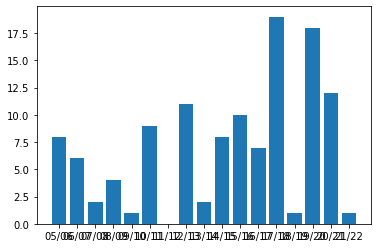

In [197]:
plt.bar(seas, np.array(points1)-np.array(points2))
plt.show()

In [209]:
from scipy.stats.stats import pearsonr

pearsonr(list(np.array(points1)-np.array(points2)), points1)[0]

0.2801180652964036

In [210]:
pearsonr(list(np.array(points1)-np.array(points2)), points1)

(0.2801180652964036, 0.2761665459612044)

In [212]:
pearsonr(list(np.array(points1)-np.array(points2)), points2)

(-0.6131384002590421, 0.008863577662485635)

### Managers overperformance

In [12]:
# create CLUB - POSITION_BY_MARKET_VALUE - POSITION_IN_SEASON_TABLE dataframe
def create_club_perf_df(url_raw, seas_start, seas_finish):
    overperf_df = pd.DataFrame(columns=['club', 'mv_pos', 'points_pos', 'overperf_coef', 'seas'])
    for seas in range(seas_start, seas_finish):
        url = url_raw+str(seas)
        tree = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')

        marketvalue_season = []
        points_season = []

        marketvalue_table = tree.find_all('td', {'class': 'hauptlink no-border-links'})
        for i in range(len(marketvalue_table)):
            club_raw = str(marketvalue_table[i])
            club_title_raw = club_raw[club_raw.find('title=\"')+7:]
            club_title = club_title_raw[:club_title_raw.find('\"')] 
            marketvalue_season.append([club_title, i+1])

        points_table = tree.find_all('td', {'class': 'no-border-links hauptlink'})
        for i in range(len(points_table)):
            club_raw = str(points_table[i])
            club_title_raw = club_raw[club_raw.find('title=\"')+7:]
            club_title = club_title_raw[:club_title_raw.find('\"')]
            points_season.append([club_title, i+1])


        marketvalue_season_df = pd.DataFrame(marketvalue_season, columns=['club', 'mv_pos'])
        points_season_df = pd.DataFrame(points_season, columns=['club', 'points_pos'])
        season_df = pd.merge(marketvalue_season_df, points_season_df, on='club')
        season_df['overperf_coef'] = season_df.mv_pos / season_df.points_pos # the higher the better overperformance
        season_df['seas'] = seas

        overperf_df = pd.concat([overperf_df, season_df], ignore_index=True)
        print(seas, end=', ')
        time.sleep(2)
    
    return overperf_df

In [13]:
overperf_df = create_club_perf_df('https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=', 2013, 2023)

2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 

In [14]:
# overperf_df.groupby('title').mean()['oerperf_coef'].sort_values(ascending=False)

In [5]:
# extract MANAGERS that were in charge of the clubs for the most of the season (in url: at least 35/38 matches)
def create_manager_perf_df(url_raw, seas_start, seas_finish):
    manager_season = []
    for seas in range(seas_start, seas_finish):
        url = url_raw.format(str(seas), str(seas)) # at least 35 games
        tree = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')

        managers_list_raw = tree.find_all('td', {'class': 'hauptlink'})
        managers_list = []
        for i in range(0, len(managers_list_raw), 2):
            managers_list.append(managers_list_raw[i].text)

        clubs_list = []
        for j in range(len(managers_list)):
            club_raw = str(tree.find_all('td', {'class': 'zentriert'})[2+j*8])
            club_title_raw = club_raw[club_raw.find('title=\"')+7:]
            club_title = club_title_raw[:club_title_raw.find('\"')] 
            clubs_list.append(club_title)

        manager_season += list(zip(managers_list, clubs_list, [seas]*len(managers_list)))

        print(seas, end=', ')
        time.sleep(2)

    managers_df = pd.DataFrame(manager_season, columns=['manager', 'club', 'seas'])
    return managers_df

In [15]:
managers_df = create_manager_perf_df('https://www.transfermarkt.com/premier-league/erfolgreichetrainer/wettbewerb/GB1/plus/1?aktiveTrainer=&saisonIdVon={}&saisonIdBis={}&anzahl=34&group=', 2013, 2023)

2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 

In [16]:
# JOIN THEM
manager_overperf = pd.merge(overperf_df, managers_df, on=['club', 'seas'])

manager_overperf['club_seas'] = manager_overperf.club + manager_overperf.seas.apply(lambda x: ', ' + str(x)[2:]+'/'+str(x+1)[2:])
manager_overperf['manager_club_seas'] = manager_overperf.manager.apply(lambda x: x.split()[-1]+', ') + manager_overperf.club + manager_overperf.seas.apply(lambda x: ', ' + str(x)[2:]+'/'+str(x+1)[2:])
manager_overperf['overperf_abs'] = manager_overperf.mv_pos - manager_overperf.points_pos

In [17]:
manager_overperf[manager_overperf.manager=='Chris Wilder']

,club,mv_pos,points_pos,overperf_coef,seas,manager,club_seas,manager_club_seas,overperf_abs
94,Sheffield United,20,9,2.222222,2019,Chris Wilder,"Sheffield United, 19/20","Wilder, Sheffield United, 19/20",11


In [18]:
manager_overperf.sort_values('overperf_abs', ascending=True).head(10)
manager_overperf.sort_values('overperf_coef', ascending=True).head(10)

manager_overperf.dtypes
manager_overperf['mv_pos'] = manager_overperf['mv_pos'].astype(int)
manager_overperf['points_pos'] = manager_overperf['points_pos'].astype(int)
manager_overperf.corr()

,mv_pos,points_pos,overperf_coef
mv_pos,1.000000,0.843853,0.114675
points_pos,0.843853,1.000000,-0.208365
overperf_coef,0.114675,-0.208365,1.000000


In [19]:
manager_overperf.sort_values('overperf_abs', ascending=True).head(10)

,club,mv_pos,points_pos,overperf_coef,seas,manager,club_seas,manager_club_seas,overperf_abs
86,AFC Bournemouth,11,18,0.611111,2019,Eddie Howe,"AFC Bournemouth, 19/20","Howe, AFC Bournemouth, 19/20",-7
21,Hull City,12,18,0.666667,2014,Steve Bruce,"Hull City, 14/15","Bruce, Hull City, 14/15",-6
29,Everton FC,7,11,0.636364,2015,Roberto Martínez,"Everton FC, 15/16","Martínez, Everton FC, 15/16",-4
50,Sunderland AFC,16,20,0.800000,2016,David Moyes,"Sunderland AFC, 16/17","Moyes, Sunderland AFC, 16/17",-4
49,Watford FC,13,17,0.764706,2016,Walter Mazzarri,"Watford FC, 16/17","Mazzarri, Watford FC, 16/17",-4
104,Brighton &amp; Hove Albion,12,16,0.750000,2020,Graham Potter,"Brighton &amp; Hove Albion, 20/21","Potter, Brighton &amp; Hove Albion, 20/21",-4
72,AFC Bournemouth,10,14,0.714286,2018,Eddie Howe,"AFC Bournemouth, 18/19","Howe, AFC Bournemouth, 18/19",-4
88,Aston Villa,13,17,0.764706,2019,Dean Smith,"Aston Villa, 19/20","Smith, Aston Villa, 19/20",-4
101,Wolverhampton Wanderers,9,13,0.692308,2020,Nuno Espírito Santo,"Wolverhampton Wanderers, 20/21","Santo, Wolverhampton Wanderers, 20/21",-4
99,Everton FC,7,10,0.700000,2020,Carlo Ancelotti,"Everton FC, 20/21","Ancelotti, Everton FC, 20/21",-3


In [20]:
manager_overperf.sort_values('overperf_abs', ascending=False).head(10)

,club,mv_pos,points_pos,overperf_coef,seas,manager,club_seas,manager_club_seas,overperf_abs
94,Sheffield United,20,9,2.222222,2019,Chris Wilder,"Sheffield United, 19/20","Wilder, Sheffield United, 19/20",11
32,Leicester City,11,1,11.000000,2015,Claudio Ranieri,"Leicester City, 15/16","Ranieri, Leicester City, 15/16",10
130,Fulham FC,19,10,1.900000,2022,Marco Silva,"Fulham FC, 22/23","Silva, Fulham FC, 22/23",9
52,West Bromwich Albion,19,10,1.900000,2016,Tony Pulis,"West Bromwich Albion, 16/17","Pulis, West Bromwich Albion, 16/17",9
92,Burnley FC,18,10,1.800000,2019,Sean Dyche,"Burnley FC, 19/20","Dyche, Burnley FC, 19/20",8
51,AFC Bournemouth,17,9,1.888889,2016,Eddie Howe,"AFC Bournemouth, 16/17","Howe, AFC Bournemouth, 16/17",8
61,Burnley FC,15,7,2.142857,2017,Sean Dyche,"Burnley FC, 17/18","Dyche, Burnley FC, 17/18",8
129,Brentford FC,16,9,1.777778,2022,Thomas Frank,"Brentford FC, 22/23","Frank, Brentford FC, 22/23",7
108,Leeds United,16,9,1.777778,2020,Marcelo Bielsa,"Leeds United, 20/21","Bielsa, Leeds United, 20/21",7
63,AFC Bournemouth,19,12,1.583333,2017,Eddie Howe,"AFC Bournemouth, 17/18","Howe, AFC Bournemouth, 17/18",7


In [224]:
manager_overperf.sort_values('overperf_coef', ascending=False).head(10)

,club,mv_pos,points_pos,overperf_coef,seas,manager,club_seas,manager_club_seas,overperf_abs
47,Leicester City,11,1,11.000000,2015,Claudio Ranieri,"Leicester City, 15/16","Ranieri, Leicester City, 15/16",10
18,Liverpool FC,5,2,2.500000,2013,Brendan Rodgers,"Liverpool FC, 13/14","Rodgers, Liverpool FC, 13/14",3
109,Sheffield United,20,9,2.222222,2019,Chris Wilder,"Sheffield United, 19/20","Wilder, Sheffield United, 19/20",11
76,Burnley FC,15,7,2.142857,2017,Sean Dyche,"Burnley FC, 17/18","Dyche, Burnley FC, 17/18",8
112,Manchester United,4,2,2.000000,2020,Ole Gunnar Solskjaer,"Manchester United, 20/21","Solskjaer, Manchester United, 20/21",2
16,Manchester City,2,1,2.000000,2013,Manuel Pellegrini,"Manchester City, 13/14","Pellegrini, Manchester City, 13/14",1
12,West Bromwich Albion,16,8,2.000000,2012,Steve Clarke,"West Bromwich Albion, 12/13","Clarke, West Bromwich Albion, 12/13",8
72,Manchester United,4,2,2.000000,2017,José Mourinho,"Manchester United, 17/18","Mourinho, Manchester United, 17/18",2
1,Manchester United,2,1,2.000000,2012,Sir Alex Ferguson,"Manchester United, 12/13","Ferguson, Manchester United, 12/13",1
43,Tottenham Hotspur,6,3,2.000000,2015,Mauricio Pochettino,"Tottenham Hotspur, 15/16","Pochettino, Tottenham Hotspur, 15/16",3


#### Serie A

In [5]:
# create CLUB - POSITION_BY_MARKET_VALUE - POSITION_IN_SEASON_TABLE dataframe
overperf_df = create_club_perf_df('https://www.transfermarkt.com/serie-a/startseite/wettbewerb/IT1/plus/?saison_id=', 2012, 2022)

2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 

In [6]:
managers_df = create_manager_perf_df('https://www.transfermarkt.com/serie-a/erfolgreichetrainer/wettbewerb/IT1/plus/1?aktiveTrainer=&saisonIdVon={}&saisonIdBis={}&anzahl=34&group=', 2012, 2022)

2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 

In [7]:
# JOIN THEM
manager_overperf = pd.merge(overperf_df, managers_df, on=['club', 'seas'])

manager_overperf['club_seas'] = manager_overperf.club + manager_overperf.seas.apply(lambda x: ', ' + str(x)[2:]+'/'+str(x+1)[2:])
manager_overperf['manager_club_seas'] = manager_overperf.manager.apply(lambda x: x.split()[-1]+', ') + manager_overperf.club + manager_overperf.seas.apply(lambda x: ', ' + str(x)[2:]+'/'+str(x+1)[2:])
manager_overperf['overperf_abs'] = manager_overperf.mv_pos - manager_overperf.points_pos

In [8]:
manager_overperf.sort_values('overperf_abs', ascending=False).head(10)

,club,mv_pos,points_pos,overperf_coef,seas,manager,club_seas,manager_club_seas,overperf_abs
15,Hellas Verona,20,10,2.000000,2013,Andrea Mandorlini,"Hellas Verona, 13/14","Mandorlini, Hellas Verona, 13/14",10
36,Chievo Verona,18,9,2.000000,2015,Rolando Maran,"Chievo Verona, 15/16","Maran, Chievo Verona, 15/16",9
82,Hellas Verona,17,9,1.888889,2019,Ivan Juric,"Hellas Verona, 19/20","Juric, Hellas Verona, 19/20",8
13,Torino FC,14,7,2.000000,2013,Gian Piero Ventura,"Torino FC, 13/14","Ventura, Torino FC, 13/14",7
95,UC Sampdoria,16,9,1.777778,2020,Claudio Ranieri,"UC Sampdoria, 20/21","Ranieri, UC Sampdoria, 20/21",7
27,Hellas Verona,19,13,1.461538,2014,Andrea Mandorlini,"Hellas Verona, 14/15","Mandorlini, Hellas Verona, 14/15",6
62,Chievo Verona,19,13,1.461538,2017,Rolando Maran,"Chievo Verona, 17/18","Maran, Chievo Verona, 17/18",6
45,Atalanta BC,9,4,2.250000,2016,Gian Piero Gasperini,"Atalanta BC, 16/17","Gasperini, Atalanta BC, 16/17",5
14,Atalanta BC,16,11,1.454545,2013,Stefano Colantuono,"Atalanta BC, 13/14","Colantuono, Atalanta BC, 13/14",5
26,Torino FC,14,9,1.555556,2014,Gian Piero Ventura,"Torino FC, 14/15","Ventura, Torino FC, 14/15",5


In [9]:
manager_overperf.sort_values('overperf_abs', ascending=True).head(10)

,club,mv_pos,points_pos,overperf_coef,seas,manager,club_seas,manager_club_seas,overperf_abs
24,Udinese Calcio,10,16,0.625000,2014,Andrea Stramaccioni,"Udinese Calcio, 14/15","Stramaccioni, Udinese Calcio, 14/15",-6
19,AC Milan,5,10,0.500000,2014,Filippo Inzaghi,"AC Milan, 14/15","Inzaghi, AC Milan, 14/15",-5
12,Udinese Calcio,8,13,0.615385,2013,Francesco Guidolin,"Udinese Calcio, 13/14","Guidolin, Udinese Calcio, 13/14",-5
102,Atalanta BC,5,8,0.625000,2021,Gian Piero Gasperini,"Atalanta BC, 21/22","Gasperini, Atalanta BC, 21/22",-3
98,Juventus FC,1,4,0.250000,2021,Massimiliano Allegri,"Juventus FC, 21/22","Allegri, Juventus FC, 21/22",-3
108,Bologna FC 1909,11,13,0.846154,2021,Siniša Mihajlović,"Bologna FC 1909, 21/22","Mihajlović, Bologna FC 1909, 21/22",-2
18,SSC Napoli,3,5,0.600000,2014,Rafael Benítez,"SSC Napoli, 14/15","Benítez, SSC Napoli, 14/15",-2
106,US Sassuolo,9,11,0.818182,2021,Alessio Dionisi,"US Sassuolo, 21/22","Dionisi, US Sassuolo, 21/22",-2
92,Udinese Calcio,12,14,0.857143,2020,Luca Gotti,"Udinese Calcio, 20/21","Gotti, Udinese Calcio, 20/21",-2
69,US Sassuolo,9,11,0.818182,2018,Roberto De Zerbi,"US Sassuolo, 18/19","Zerbi, US Sassuolo, 18/19",-2


In [10]:
manager_overperf.sort_values('overperf_abs', ascending=False).head(20)

,club,mv_pos,points_pos,overperf_coef,seas,manager,club_seas,manager_club_seas,overperf_abs
15,Hellas Verona,20,10,2.000000,2013,Andrea Mandorlini,"Hellas Verona, 13/14","Mandorlini, Hellas Verona, 13/14",10
36,Chievo Verona,18,9,2.000000,2015,Rolando Maran,"Chievo Verona, 15/16","Maran, Chievo Verona, 15/16",9
82,Hellas Verona,17,9,1.888889,2019,Ivan Juric,"Hellas Verona, 19/20","Juric, Hellas Verona, 19/20",8
13,Torino FC,14,7,2.000000,2013,Gian Piero Ventura,"Torino FC, 13/14","Ventura, Torino FC, 13/14",7
95,UC Sampdoria,16,9,1.777778,2020,Claudio Ranieri,"UC Sampdoria, 20/21","Ranieri, UC Sampdoria, 20/21",7
27,Hellas Verona,19,13,1.461538,2014,Andrea Mandorlini,"Hellas Verona, 14/15","Mandorlini, Hellas Verona, 14/15",6
62,Chievo Verona,19,13,1.461538,2017,Rolando Maran,"Chievo Verona, 17/18","Maran, Chievo Verona, 17/18",6
45,Atalanta BC,9,4,2.250000,2016,Gian Piero Gasperini,"Atalanta BC, 16/17","Gasperini, Atalanta BC, 16/17",5
14,Atalanta BC,16,11,1.454545,2013,Stefano Colantuono,"Atalanta BC, 13/14","Colantuono, Atalanta BC, 13/14",5
26,Torino FC,14,9,1.555556,2014,Gian Piero Ventura,"Torino FC, 14/15","Ventura, Torino FC, 14/15",5


### Club colors

In [34]:
url = 'https://www.transfermarkt.com/premier-league/daten/wettbewerb/GB1/plus/1'
tree = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')

In [4]:
def league_club_colors(tree):
    clubs_colors = tree.find_all('div', {'class': 'vereinsfarbe'})
    clubs_names = tree.find_all('td', {'class': 'hauptlink no-border-links'})

    colorlist = []
    for i in range(len(clubs_colors)):
        club = str(clubs_colors[i])
        colors = []
        while club.find('background-color:') != -1:
            start = club.find('background-color:') + 17
            club = club[start:]
            fin = club.find('\"')
            colors.append(club[:fin].upper())
        colorlist.append(colors)

    namelist = []
    for j in range(len(clubs_names)):
        namelist.append(clubs_names[j].text)
    
    return namelist, colorlist

# pd.DataFrame(list(zip(*league_club_colors(tree))), columns=['club', 'colors'])

In [124]:
namelist, colorlist = league_club_colors(tree)

colorlist_unnest = []
for l in colorlist:
    colorlist_unnest += l

colors_gr = pd.Series(colorlist_unnest).value_counts()

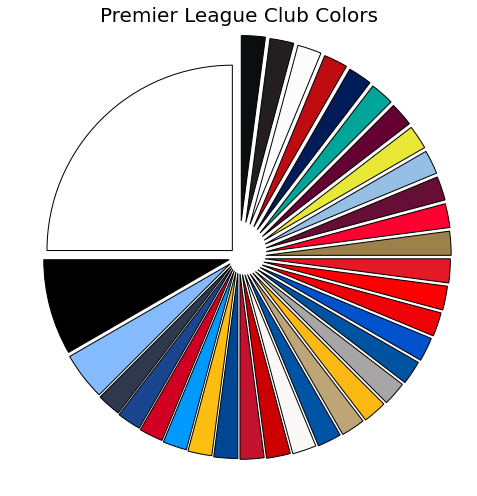

In [152]:
colors_gr_plot = colors_gr[:-1]
explode = np.arange(0.05, 0.2, step=(0.2-0.05)/len(colors_gr_plot))

colors = colors_gr_plot.index

def func(pct, total_values):
    absolute = int(pct / 100.*np.sum(total_values))
    return '{:.1f}%\n({:d})'.format(pct, absolute)
 
# plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts = ax.pie( # autotexts
    colors_gr_plot.values,
#     autopct = lambda pct: func(pct, colors_gr_plot.values),
    explode = explode, colors = colors, startangle = 90,
#     labels = colors_gr_plot.index,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    shadow = False)

plt.setp(autotexts, size=8)
ax.set_title('Premier League Club Colors', loc='center', pad=0, size=20)
plt.tight_layout()
plt.show()

In [155]:
# group colors
# https://www.w3schools.com/colors/colors_groups.asp

# plt.figure(figsize=(15, 6))
# plt.bar(colors_gr.index, colors_gr.values, color=colors_gr.index)
# plt.xticks(rotation=90)
# plt.show()

In [9]:
# group colors
d = {'white': ['#FFFFFF', '#FAF7F7', '#FCFCFC'], 
     'black': ['#000000', '#231F20', '#0C0D0F'], 
     'blue': ['#84BBFF', '#2E394E', '#1B458F', '#0099FF', '#004793', '#0054A6', '#0053A0', '#0052CC', '#95BFE5', '#001C58'], 
     'red': ['#D10022', '#C4122E', '#CC0000', '#EF0107', '#FF0000', '#E41927', '#FF0033', '#BF0C10', '#D9020D'], 
     'yellow': ['#E9E837'], 
     'green': ['#00A499'], 
     'orange': ['#FDBE11', '#FDB913'], 
     'brown': ['#670E36', '#660033'], 
     'gold': ['#BEA578', '#9C824A'], 
     'grey': ['#A7A5A6']}

def key_retrieve(d, val):
    for k in d.keys():
        if val in d[k]:
            return k
    return val

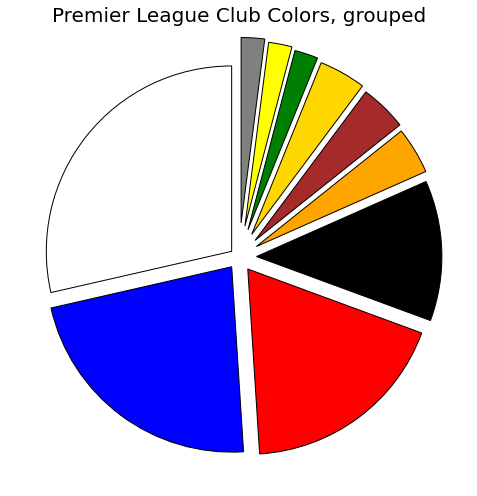

In [153]:
colors_gr_plot = pd.Series([key_retrieve(d, v) for v in colorlist_unnest]).value_counts()
explode = np.arange(0.05, 0.2, step=(0.2-0.05)/len(colors_gr_plot))

colors = colors_gr_plot.index

def func(pct, total_values):
    absolute = int(pct / 100.*np.sum(total_values))
    return '{:.1f}%\n({:d})'.format(pct, absolute)
 
# plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts = ax.pie( # autotexts
    colors_gr_plot.values,
#     autopct = lambda pct: func(pct, colors_gr_plot.values),
    explode = explode, colors = colors, startangle = 90,
#     labels = colors_gr_plot.index,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    shadow = False)

plt.setp(autotexts, size=8)
ax.set_title('Premier League Club Colors, grouped', loc='center', pad=0, size=20)
plt.tight_layout()
plt.show()

#### Serie A

In [2]:
url = 'https://www.transfermarkt.com/serie-a/daten/wettbewerb/IT1/plus/1'
tree = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')

In [15]:
namelist, colorlist = league_club_colors(tree)

colorlist_unnest = []
for l in colorlist:
    colorlist_unnest += l[:2] # CUT FOR ONLY FIRST TWO COLORS

colors_gr = pd.Series(colorlist_unnest).value_counts()

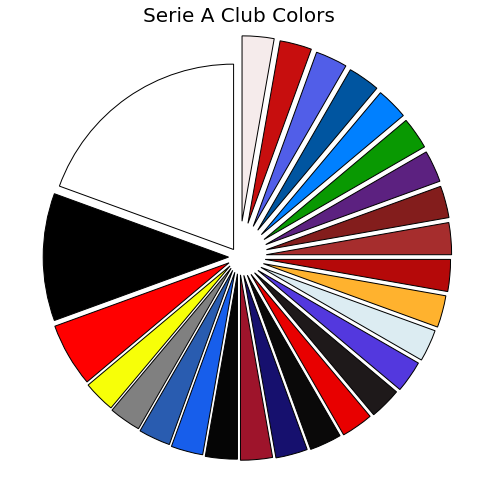

In [16]:
colors_gr_plot = colors_gr[:-1]
explode = np.arange(0.05, 0.2, step=(0.2-0.05)/len(colors_gr_plot))

colors = colors_gr_plot.index

def func(pct, total_values):
    absolute = int(pct / 100.*np.sum(total_values))
    return '{:.1f}%\n({:d})'.format(pct, absolute)
 
# plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts = ax.pie( # autotexts
    colors_gr_plot.values,
#     autopct = lambda pct: func(pct, colors_gr_plot.values),
    explode = explode, colors = colors, startangle = 90,
#     labels = colors_gr_plot.index,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    shadow = False)

# plt.setp(autotexts, size=8)
ax.set_title('Serie A Club Colors', loc='center', pad=0, size=20)
plt.tight_layout()
plt.show()

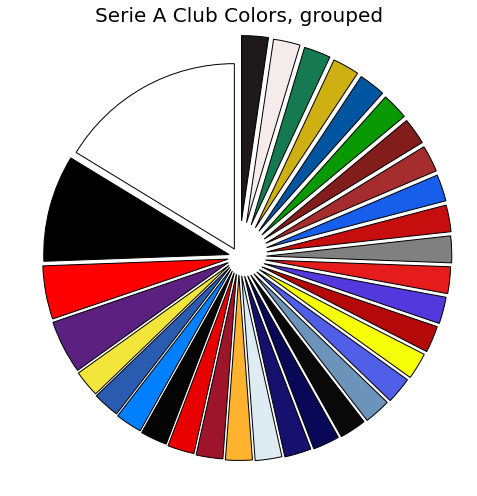

In [12]:
colors_gr_plot = pd.Series([key_retrieve(d, v) for v in colorlist_unnest]).value_counts()
explode = np.arange(0.05, 0.2, step=(0.2-0.05)/len(colors_gr_plot))

colors = colors_gr_plot.index

def func(pct, total_values):
    absolute = int(pct / 100.*np.sum(total_values))
    return '{:.1f}%\n({:d})'.format(pct, absolute)
 
# plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts = ax.pie( # autotexts
    colors_gr_plot.values,
#     autopct = lambda pct: func(pct, colors_gr_plot.values),
    explode = explode, colors = colors, startangle = 90,
#     labels = colors_gr_plot.index,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    shadow = False)

# plt.setp(autotexts, size=8)
ax.set_title('Serie A Club Colors, grouped', loc='center', pad=0, size=20)
plt.tight_layout()
plt.show()

## Neymar's injuries

In [133]:
# https://www.transfermarkt.com/neymar/verletzungen/spieler/68290
ninj = pd.read_excel('neymar_injury.xlsx').drop(index=0).reset_index(drop=True)
month_to_num = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
                'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

def int_to_num(integer):
    if len(str(integer)) == 1:
        return '0' + str(integer)
    return str(integer)

ninj['from_yyyy'] = ninj['from'].apply(lambda x: x.split(', ')[1])
ninj['until_yyyy'] = ninj['until'].apply(lambda x: x.split(', ')[1])

# x.split(', ')[1] + '-'
ninj['from_f'] = ninj['from'].apply(lambda x: '2022-' + month_to_num[x.split(', ')[0].split()[0]] 
                                    + '-' + int_to_num(x.split(', ')[0].split()[1]))
ninj['until_f'] = ninj['until'].apply(lambda x: '2022-' + month_to_num[x.split(', ')[0].split()[0]] 
                                    + '-' + int_to_num(x.split(', ')[0].split()[1]))

ninj['days_int'] = ninj['days'].apply(lambda x: int(x.split()[0]))

ninj['from_dt'] = pd.to_datetime(ninj['from_f']) # .dt.strftime('%m-%d')
ninj['until_dt'] = pd.to_datetime(ninj['until_f']) # .dt.strftime('%m-%d')

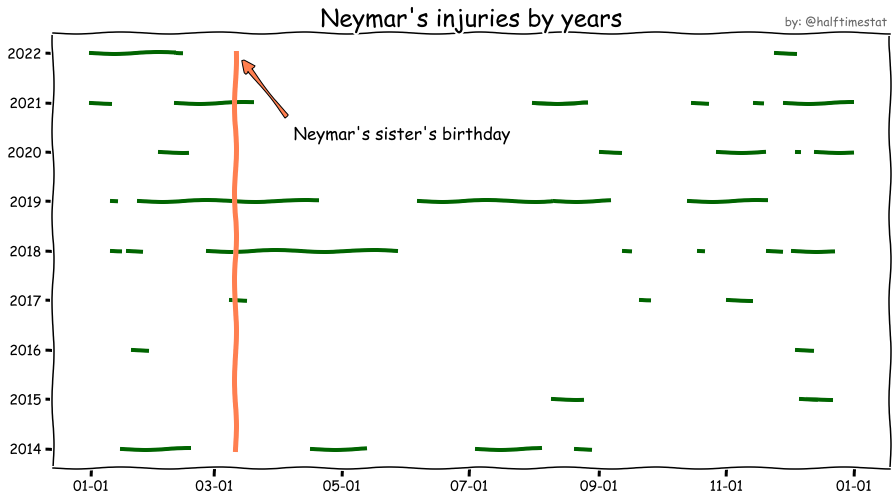

In [150]:
from matplotlib.dates import DateFormatter

with plt.xkcd():
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)
    # plt.plot(list(ninj[['from_f', 'until_f']].loc[0]), [2022, 2022], c='orange')

    for i in range(len(ninj)):
        if ninj['from_yyyy'].loc[i] == ninj['until_yyyy'].loc[i]:
            yyyy = int(ninj['from_yyyy'].loc[i])
            from_dt, to_dt = list(ninj[['from_dt', 'until_dt']].loc[i])

            ax.plot([from_dt, to_dt], [yyyy, yyyy], c='darkgreen', linewidth=4)


    # if year changed, do by hand
    # ninj[ninj.from_f.apply(lambda x: x.split('-')[0]) != ninj.until_f.apply(lambda x: x.split('-')[0])]
    ax.plot([pd.to_datetime('2022-11-29'), pd.to_datetime('2022-12-31')], [2021, 2021], c='darkgreen', linewidth=4)
    ax.plot([pd.to_datetime('2022-01-01'), pd.to_datetime('2022-02-10')], [2022, 2022], c='darkgreen', linewidth=4)

    ax.plot([pd.to_datetime('2022-12-14'), pd.to_datetime('2022-12-31')], [2020, 2020], c='darkgreen', linewidth=4)
    ax.plot([pd.to_datetime('2022-01-01'), pd.to_datetime('2022-01-10')], [2021, 2021], c='darkgreen', linewidth=4)

    ax.plot([pd.to_datetime('2022-03-11')]*9, np.arange(2014, 2023), color='coral', linewidth=5)
    ax.annotate('Neymar\'s sister\'s birthday', xy=(19063, 2022), xytext=(19090, 2020.25), size=17,
                arrowprops=dict(facecolor='coral', shrink=0.1))

    ax.set_title('Neymar\'s injuries by years', size=24)
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d')) # xaxis as month-day
    
    plt.text(19325, 2022.55, 'by: @halftimestat', color='dimgrey', size=12)
    plt.show()

Despite multiple accusations of 🇧🇷 Neymar faking injuries to 🎉 party for his sister's birthday, looks like, the only year it could've possible been the case is 2017

And he's out again in 2023...

## Popularity of formations

https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=

In [ ]:
# # PARSE
# leag = 'L1' # 'ES1' # 'IT1' # 'GB1'
# seasons_club_formations_d = {}
# for yyyy in range(2013, 2023):
#     # club list for the season
#     url = 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/' + leag + '/plus/?saison_id=' + str(yyyy)
#     tree = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')
#     club_list = tree.find_all('td', {'class': 'hauptlink no-border-links'})
#     club_formations_d = {}

#     for i in range(len(club_list)):
#         left_href = str(club_list[i]).find('a href=')
#         right_href = str(club_list[i])[left_href+9:].find('\"')
#         raw_link = str(club_list[i])[left_href+9:left_href+9+right_href]
#         raw_name = raw_link[:raw_link.find('/')]

#         # raw_name_cut = raw_link.rstrip('/saison_id/'+str(yyyy))
#         # raw_code = raw_name_cut[raw_name_cut.rfind('/')+1:]
#         raw_code = raw_link.split('/')[-3]

#         # access the club matches list
#         club_url = 'https://www.transfermarkt.com/' + raw_name + '/spielplandatum/verein/' + raw_code + '/plus/0?saison_id=' + str(yyyy)
#         subtree = BeautifulSoup(requests.get(club_url, headers=headers).content, 'html.parser')

#         club_formations = []
#         for j in range(7, len(subtree.find_all('td', {'class': 'zentriert'})), 8):
#             if '-' in subtree.find_all('td', {'class': 'zentriert'})[j].text.strip(): # != '':
#                 club_formations.append(subtree.find_all('td', {'class': 'zentriert'})[j].text)

#         club_formations_d[raw_name] = club_formations

#         time.sleep(1.5)
    
#     seasons_club_formations_d[str(yyyy)] = club_formations_d
#     print(yyyy, end=', ')

In [8]:
# PARSE
leag = 'L1' # 'ES1' # 'IT1' # 'GB1'
seasons_club_formations_d = {}
for yyyy in range(2013, 2023):
    club_formations_d = {}
    
    for leag in ['L1', 'ES1', 'IT1', 'GB1', 'FR1']:
        # club list for the season
        url = 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/' + leag + '/plus/?saison_id=' + str(yyyy)
        tree = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')
        club_list = tree.find_all('td', {'class': 'hauptlink no-border-links'})

        for i in range(len(club_list)):
            left_href = str(club_list[i]).find('a href=')
            right_href = str(club_list[i])[left_href+9:].find('\"')
            raw_link = str(club_list[i])[left_href+9:left_href+9+right_href]
            raw_name = raw_link[:raw_link.find('/')]

            # raw_name_cut = raw_link.rstrip('/saison_id/'+str(yyyy))
            # raw_code = raw_name_cut[raw_name_cut.rfind('/')+1:]
            raw_code = raw_link.split('/')[-3]

            # access the club matches list
            club_url = 'https://www.transfermarkt.com/' + raw_name + '/spielplandatum/verein/' + raw_code + '/plus/0?saison_id=' + str(yyyy)
            subtree = BeautifulSoup(requests.get(club_url, headers=headers).content, 'html.parser')

            club_formations = []
            for j in range(7, len(subtree.find_all('td', {'class': 'zentriert'})), 8):
                if '-' in subtree.find_all('td', {'class': 'zentriert'})[j].text.strip(): # != '':
                    club_formations.append(subtree.find_all('td', {'class': 'zentriert'})[j].text)

            club_formations_d[raw_name] = club_formations

            time.sleep(0.5)
    
    seasons_club_formations_d[str(yyyy)] = club_formations_d
    print(yyyy, end=', ')

2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 

In [9]:
seasons_club_formations_d

{'2013': {'fc-bayern-munchen': ['4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-2-3-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-1-4-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-1-4-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-1-4-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-1-4-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '3-4-3'],
  'borussia-dortmund': ['4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',
   '4-2-3-1',

In [10]:
# dictionary -> DataFrame

seasons_club_formations_df = pd.DataFrame(columns=['formations', 'club', 'yyyy'])
for y in list(seasons_club_formations_d.keys()):
    club_formations_df = pd.DataFrame(columns=['formations', 'club'])
    for c in list(seasons_club_formations_d[y]):
        # formations_df = pd.DataFrame(seasons_club_formations_d[y][c], columns=['formations'])
        formations_df = pd.DataFrame( # USE STRIPPED FORMATION NAME: '4-3-3 Attacking' -> '4-3-3'
            pd.Series(seasons_club_formations_d[y][c]).apply(lambda x: x.split(' ')[0]), columns=['formations'])

        formations_df['club'] = c
        club_formations_df = pd.concat([club_formations_df, formations_df], axis=0)
    
    club_formations_df['yyyy'] = y
    seasons_club_formations_df = pd.concat([seasons_club_formations_df, club_formations_df], axis=0)

<ipython-input-10-a5e44e036e7f>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(seasons_club_formations_d[y][c]).apply(lambda x: x.split(' ')[0]), columns=['formations'])


In [11]:
seasons_club_formations_df

,formations,club,yyyy
0,4-1-4-1,fc-bayern-munchen,2013
1,4-1-4-1,fc-bayern-munchen,2013
2,4-1-4-1,fc-bayern-munchen,2013
3,4-1-4-1,fc-bayern-munchen,2013
4,4-1-4-1,fc-bayern-munchen,2013
...,...,...,...
35,4-3-3,ac-ajaccio,2022
36,4-3-3,ac-ajaccio,2022
37,4-4-2,ac-ajaccio,2022
38,3-4-3,ac-ajaccio,2022


In [12]:
### SAVE DATAFRAME
# seasons_club_formations_df.to_csv('I1_seasons_club_formations_df.csv', index=False)
# seasons_club_formations_df.to_csv('ES1_seasons_club_formations_df.csv', index=False)
# seasons_club_formations_df.to_csv('L1_seasons_club_formations_df.csv', index=False)
seasons_club_formations_df.to_csv('BIG5_seasons_club_formations_df.csv', index=False)
###

In [13]:
# transpose dataset to yyyy / formations format
# seasons_club_formations_df = pd.read_csv('I1_seasons_club_formations_df.csv')
# seasons_club_formations_df = pd.read_csv('ES1_seasons_club_formations_df.csv')
# seasons_club_formations_df = pd.read_csv('L1_seasons_club_formations_df.csv')
seasons_club_formations_df = pd.read_csv('BIG5_seasons_club_formations_df.csv')

yf_grouped = seasons_club_formations_df.groupby(['yyyy', 'formations'], as_index=False).count()
yf_grouped['yyyy'] = yf_grouped['yyyy'].astype(int)
yf_grouped_t = yf_grouped.pivot(index='yyyy', columns='formations', values='club')
round(yf_grouped_t / yf_grouped_t.sum(axis=0), 2)

formations,3-1-4-2,3-3-3-1,3-4-1-2,3-4-2-1,3-4-3,3-5-2,4-1-3-2,4-1-4-1,4-2-3-1,4-3-1-2,4-3-2-1,4-3-3,4-4-1-1,4-4-2,4-5-1,5-3-2,5-4-1
yyyy,,,,,,,,,,,,,,,,,
2013,0.00,NaN,0.00,0.01,0.04,0.09,0.09,0.10,0.15,0.12,0.21,0.09,0.11,0.09,0.23,0.08,0.04
2014,0.04,0.52,0.00,0.02,0.04,0.07,0.17,0.10,0.13,0.16,0.10,0.09,0.16,0.11,0.16,0.08,0.05
2015,0.00,0.04,0.01,0.03,0.03,0.06,0.03,0.15,0.12,0.15,0.13,0.10,0.21,0.11,0.08,0.05,0.06
2016,0.07,0.04,0.03,0.10,0.07,0.07,0.09,0.12,0.09,0.11,0.12,0.13,0.13,0.10,0.15,0.11,0.11
2017,0.11,0.20,0.06,0.11,0.10,0.10,0.05,0.11,0.10,0.07,0.05,0.11,0.09,0.11,0.08,0.09,0.10
2018,0.17,NaN,0.22,0.07,0.11,0.11,0.07,0.10,0.07,0.12,0.07,0.11,0.06,0.11,0.06,0.16,0.15
2019,0.05,0.04,0.16,0.08,0.18,0.12,NaN,0.10,0.08,0.10,0.09,0.09,0.08,0.11,0.12,0.10,0.14
2020,0.14,0.08,0.22,0.16,0.11,0.13,0.03,0.09,0.09,0.04,0.08,0.08,0.08,0.11,0.04,0.07,0.09
2021,0.26,0.08,0.18,0.16,0.15,0.12,0.29,0.08,0.08,0.07,0.11,0.09,0.04,0.10,0.03,0.15,0.13


In [43]:
seasons_club_formations_df[seasons_club_formations_df.club=='fc-bayern-munchen'].groupby(['yyyy', 'formations']).count()

club
yyyy formations      
2013 3-4-3          1
     4-1-4-1       25
     4-2-3-1       30
2014 3-3-3-1        1
     3-4-2-1        4
     3-4-3          5
     3-5-2          7
     4-1-4-1        6
     4-2-3-1        8
     4-3-1-2        1
     4-3-3         10
     4-4-2         10
2015 3-3-3-1        1
     3-4-2-1        1
     3-4-3          6
     3-5-2          3
     4-1-4-1       21
     4-2-3-1        4
     4-3-3         13
     4-4-2          4
2016 4-1-4-1        2
     4-2-3-1       24
     4-3-1-2        1
     4-3-3         23
2017 4-1-4-1       12
     4-2-3-1       15
     4-3-3         26
2018 4-1-4-1        8
     4-2-3-1       27
     4-3-3         14
2019 3-4-3          1
     4-1-4-1        3
     4-2-3-1       33
     4-3-3         15
2020 3-4-2-1        1
     4-1-4-1        3
     4-2-3-1       45
     4-3-3          1
2021 3-4-1-2        1
     3-4-2-1       11
     3-4-3          1
     4-1-4-1        1
     4-2-3-1       32
     4-3-3          1
2022 3-1-4-2        3
     3-4-2-1        1
     4-1-4-1        1
     4-2-3-1       23
     4-4-2          5

In [18]:
# RAW NUMBER OF GAMES
fig = px.line(yf_grouped, x='yyyy', y='club', color='formations', 
              labels={'club': 'games played in the formation', 'yyyy': ''}, 
             title='Popularity of formations, BIG 5 Leagues')
fig.show()

In [19]:
# SHARE OF GAMES (version for plot with normalization to # of matches per year)
# should be same # of matches every season, except current, so not much different from RAW NUMBER OF GAMES
sss = pd.DataFrame(yf_grouped.groupby(['yyyy'], as_index=False).sum())
sss_enr = pd.merge(yf_grouped, sss, on=['yyyy'])
sss_enr['club'] = sss_enr.club_x / sss_enr.club_y

fig = px.line(sss_enr, x='yyyy', y='club', color='formations', color_discrete_sequence=px.colors.qualitative.Dark24,
              labels={'club': 'share of games played in the formation', 'yyyy': ''}, 
             title='Popularity of formations, BIG 5 Leagues', # Premier League
             width=950, height=550)

fig.add_annotation(x=2021.2, y=0.5, text='by: @halftimestat', showarrow=False) # x=8.25, y=0.5
fig.show()

In [20]:
yf_grouped['defenders'] = yf_grouped['formations'].apply(lambda x: x.split('-')[0])
sss_def = yf_grouped.groupby(['yyyy', 'defenders'], as_index=False).sum()
# normalized
sss = pd.DataFrame(sss_def.groupby(['yyyy'], as_index=False).sum())
sss_def_enr = pd.merge(sss_def, sss, on=['yyyy'])
sss_def_enr['club'] = sss_def_enr.club_x / sss_def_enr.club_y

fig = px.line(sss_def_enr, x='yyyy', y='club', color='defenders', 
              labels={'club': 'share of games played in the formation', 'yyyy': '', 'defenders': 'N-back formation'}, 
             title='Popularity of formations, BIG 5 Leagues',
             width=950, height=550)
fig.add_annotation(x=2021.2, y=1.05, text='by: @halftimestat', showarrow=False) # x=8.25, y=0.975
fig.show()

In [21]:
yf_grouped['forwards'] = yf_grouped['formations'].apply(lambda x: x.split('-')[-1])
sss_for = yf_grouped.groupby(['yyyy', 'forwards'], as_index=False).sum()
# normalized
sss = pd.DataFrame(sss_for.groupby(['yyyy'], as_index=False).sum())
sss_for_enr = pd.merge(sss_for, sss, on=['yyyy'])
sss_for_enr['club'] = sss_for_enr.club_x / sss_for_enr.club_y

fig = px.line(sss_for_enr, x='yyyy', y='club', color='forwards', 
              labels={'club': 'share of games played in the formation', 'yyyy': '', 'forwards': 'N-forward formation'}, 
             title='Popularity of formations, BIG 5 Leagues',
             width=950, height=550)
fig.show()